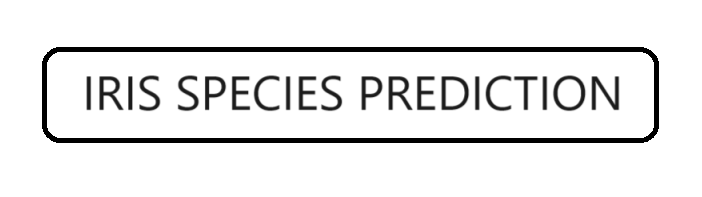

### Importing necessary libraries

In [1]:
import seaborn as sns
sns.set()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading dataset

In [2]:
iris_df = pd.read_csv('IRIS.csv')

In [3]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- All the columns are numeric only, Encoding is not required

In [5]:
iris_df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Finding null values

In [6]:
iris_df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

- No null values

### Finding outliers

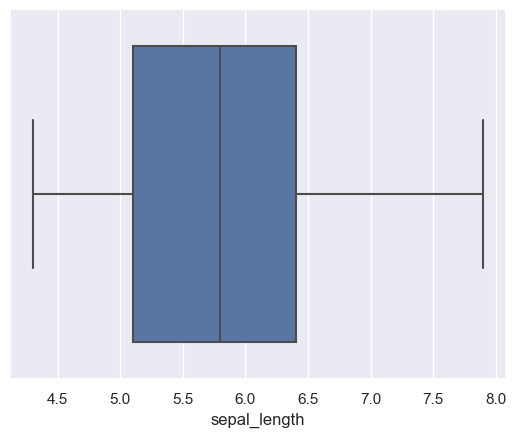

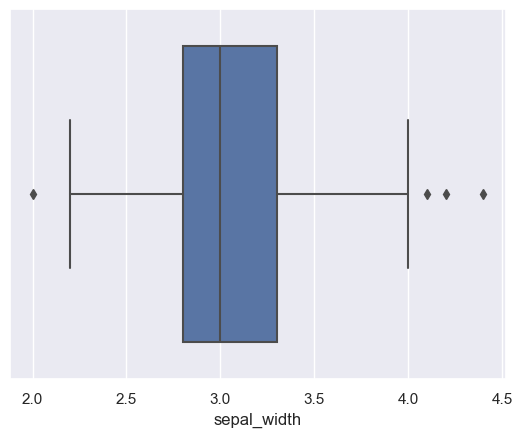

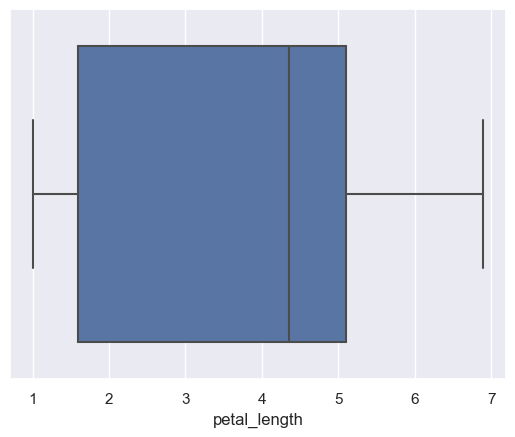

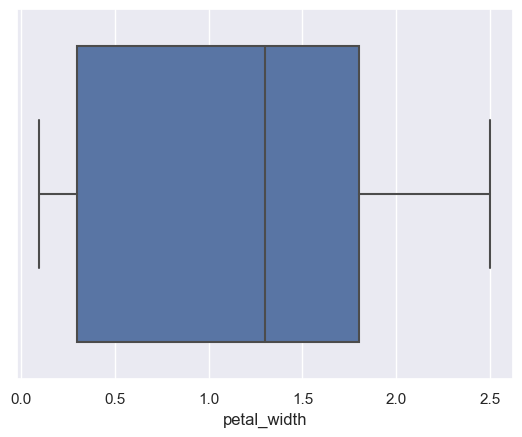

In [7]:
for i in iris_df.select_dtypes(exclude='object').columns:
    sns.boxplot(iris_df[i])
    plt.show()
    

- Only sepal_width contains outliers, Those are required to differentiate species

### Balancing Dataset

In [8]:
iris_df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

- Balanced dataset

### Splitting data into DV & IDV

In [9]:
x=iris_df.drop('species',axis=1)
y=iris_df [['species']]

In [10]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
y

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [12]:
y['species']=y['species'].astype('category')
y['species']=y['species'].cat.codes

In [13]:
y

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### Splitting data into train & test

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2)

## Model Building

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [16]:
#logistic
logit=LogisticRegression(multi_class='multinomial')

In [17]:
#DecisionTree
dtree=DecisionTreeClassifier()

In [18]:
#Bagging
bagg=BaggingClassifier()

In [19]:
#Randomforest
rf=RandomForestClassifier()

In [20]:
#Boosting
gb=GradientBoostingClassifier()
xgb=XGBClassifier()

In [22]:
#NAIVEBAYES
mnb=MultinomialNB()

In [23]:
#K nearest neighbor
knn=KNeighborsClassifier()

In [24]:
list1=[(logit,'logistic',1),(dtree,'decisiontree',2),(bagg,'bagging',3),(rf,'randomforest',4),(gb,'GradientBoost',5),(xgb,'XGBoost',6),(mnb,'MultinomialNB',7),(knn,'KNN',8)]

In [25]:
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print('#'*75)
    print(f'Cross validation of {model_name}')
    Train_cvs=cross_val_score(model,x_train,y_train,cv=10).mean()
    Test_cvs=cross_val_score(model,x_test,y_test,cv=10).mean()
    variance=abs(Train_cvs-Test_cvs)
    print('Train cvs:',Train_cvs)
    print('Test cvs:',Test_cvs)
    print('variance:',variance)
    if variance>0.1 :
        print(f'Overfitting {model_name}')

###########################################################################
Cross validation of logistic
Train cvs: 0.9643939393939395
Test cvs: 0.925
variance: 0.039393939393939426
###########################################################################
Cross validation of decisiontree
Train cvs: 0.9727272727272727
Test cvs: 0.925
variance: 0.04772727272727262
###########################################################################
Cross validation of bagging
Train cvs: 0.9553030303030303
Test cvs: 0.95
variance: 0.005303030303030365
###########################################################################
Cross validation of randomforest
Train cvs: 0.956060606060606
Test cvs: 0.95
variance: 0.0060606060606061
###########################################################################
Cross validation of GradientBoost
Train cvs: 0.9727272727272727
Test cvs: 0.95
variance: 0.022727272727272707
###########################################################################
Cross val

In [26]:
#classification report
from sklearn.metrics import classification_report
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    print('#'*75)
    print(f'Classification report of {model_name}')
    print('='*75)
    Train_cfr=classification_report(y_train,y_pred_train)
    Test_cfr=classification_report(y_test,y_pred_test)
    print('Train classification report:',Train_cfr)
    print('Test classification report:',Test_cfr)

###########################################################################
Classification report of logistic
Train classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       0.97      0.95      0.96        39
           2       0.95      0.97      0.96        39

    accuracy                           0.97       112
   macro avg       0.97      0.97      0.97       112
weighted avg       0.97      0.97      0.97       112

Test classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.91      0.95        11
           2       0.92      1.00      0.96        11

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

#######################################################################

Confusion matrix of logistic


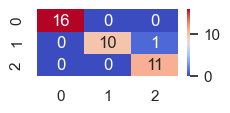

Confusion matrix of decisiontree


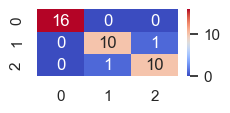

Confusion matrix of bagging


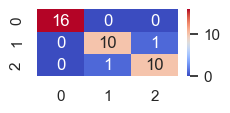

Confusion matrix of randomforest


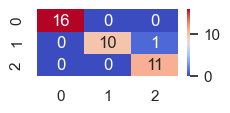

Confusion matrix of GradientBoost


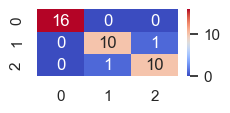

Confusion matrix of XGBoost


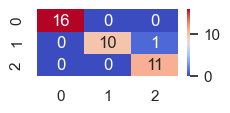

Confusion matrix of MultinomialNB


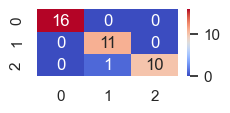

Confusion matrix of KNN


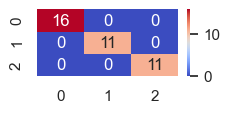

In [27]:
#Confusion matrix:
from sklearn.metrics import confusion_matrix
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    cm=confusion_matrix(y_test,y_pred_test)
    print(f'Confusion matrix of {model_name}')
    plt.figure(figsize=(5,5))
    plt.subplot(5,2,i)
    sns.heatmap(cm,annot=True,cmap='coolwarm')
    plt.show()

In [28]:
#Accuracy_Score
from sklearn.metrics import accuracy_score
accuracy_list=[]
for model,model_name,i in list1:
    model.fit(x_train,y_train)
    y_pred_train=model.predict(x_train)
    y_pred_test=model.predict(x_test)
    test_acc=accuracy_score(y_test,y_pred_test)
    accuracy_list.append(test_acc)

In [29]:
model=['logistic','decisiontree','bagging','randomforest','GradientBoost','XGBoost','MultinomialNB','KNN']

In [30]:
metrics_df=pd.DataFrame({'model_name':model,'Accuracy':accuracy_list})

In [31]:
metrics_df

,model_name,Accuracy
0,logistic,0.973684
1,decisiontree,0.947368
2,bagging,0.973684
3,randomforest,0.973684
4,GradientBoost,0.947368
5,XGBoost,0.973684
6,MultinomialNB,0.973684
7,KNN,1.000000


## Summary 

### We can observe all the model given 99% accuracy with negligible variance
### BEST MODEL : KNN